In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

## 데이터 탐색

In [2]:
news1 = pd.read_csv("data/2020.01.01_2020.12.31_1.csv")
news1.head(10)

,0
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,"“우리 아이와 반려동물, 함께 생활해도 괜찮을까?”"
4,"[영상]반려동물 식품의 세계화 ""정부지원 받아 글로벌기업으로 우뚝"""
5,배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공
6,"반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가"
7,2021년부터 동물보호법 상 맹견은 책임보험 의무화
8,[웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다
9,"지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여"


In [3]:
news2 = pd.read_csv("data/2021.01.01_2021.12.31_1.csv")
news2.head(10)

,0
0,이재명 코로나 거점 전담병원 방문…‘반려동물’ 유튜브 출연
1,반려동물 함께 즐기는 스타벅스 더북한강R 점 오픈
2,"잔인한 방법으로 개 도살, 허가 없이 번식도…동물 학대 적발"
3,"반려동물도 코로나 감염…""확진자 재택치료시 분리해야"""
4,올해 최다 이용 반려동물 앱 1위는 펫프렌즈
5,반려동물은 제2의 고객… 펫팸족 공략나선 LCC
6,‘면적 제한 폐지’ 농지원부 작성 의무화... 동물보건사 자격제도 시행
7,"울산 남구, 반려동물정책계·치매관리계 신설…조직개편 단행"
8,"허은아 ""이재명, 반려견 '이행복'은 어디에..동물에 대한 애정 없어"""
9,스파이더맨 보러 간 영화관 팝콘 속에서 나온 '햄스터' 반려동물로 입양한 소...


In [4]:
news3 = pd.read_csv("data/2022.01.01_2022.12.25_1.csv")
news3.head(10)

,0
0,"尹대통령, 은퇴 안내견 입양…관저에 11번째 동물 식구(종합)"
1,"윤 대통령 부부, 은퇴 안내견 '새롬이' 입양… 11번째 반려동물"
2,[영상]부산 1호 반려동물 테마파크...주민들이 반대하는 이유
3,[정치톡톡] 정치권 성탄 메시지 / '민주당의 길' 출범 / 대통령 11번째 반려동...
4,'동물복지 조례·보호센터 직영 운영'…사람과 동물이 행복한 고양시
5,'TV동물농장' 뒷다리 마비 웰시코기 '장수'
6,경기도반려동물테마파크의 배신?… 지원시설 빼고 추모관뿐
7,"볼보자동차, 서울시에 반려동물 물품 5천만원 상당 기부"
8,"서울시, 반려동물 '사료검정기관' 지정…전국 지자체 중 최초"
9,삶이 위태로운 야생동물의 똥이 우리에게 하는 말 [반려인의 오후]


In [5]:
kipris = pd.read_csv("data/kipris.csv")
kipris.head(5)

,대표도면,출원번호,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020210147821,반려동물용 항산화 보조제 및 그 제조 방법(antioxidant supplement...,antioxidant supplements for companion animal a...,등록,A23K 20/10|A23K 50/40|A61K 9/48|A23K 20/158|A2...,(주)한국반려동물영양연구소,문춘오,정설령,2021.11.01,1.024582e+12,2022.10.19,NaN,NaN
1,NaN,1020190100688,스마트폰을 이용한 반려동물 미용샵 예약관리 시스템 및 방법(RESERVATION S...,RESERVATION SYSTEM AND METHOD FOR A PET BEAUTY...,거절,G06Q 50/10|G06Q 10/02|G06Q 30/02|G06Q 50/30|G0...,주식회사 펫미,우정연,백영호,2019.08.18,NaN,NaN,1.020210e+12,2021.02.26
2,NaN,1020200081386,"반려동물의 3D 복원 및 감정 분석을 통한 컨텐츠 제공 서버, 사용자 단말 및 그 ...",SERVER AND USER EQUIPMENT FOR PROVIDING CONTEN...,등록,G06T 7/55|G06T 7/194|G06T 13/40|G06T 11/60|G06...,주식회사 엘지유플러스,특허법인 무한,유한규,2020.07.02,1.024808e+12,2022.12.20,1.020220e+12,2022.01.11
3,NaN,1020210044524,딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치(A method and el...,A method and electronic device for distinguish...,공개,G16H 50/70|G16H 50/20|G16H 30/40|G16H 30/20|G0...,주식회사 알파도,박수영,지영호,2021.04.06,NaN,NaN,1.020220e+12,2022.10.14
4,NaN,1020220060339,스마트 반려동물 배변패드 처리장치(Smart companion animal defe...,Smart companion animal defecation pad disposal...,등록,A01K 1/01|A01K 23/00,충북대학교 산학협력단,김정현,이아연|구승회,2022.05.17,1.024807e+12,2022.12.20,NaN,NaN


In [6]:
news1.shape, news2.shape, news3.shape, kipris.shape

((4000, 1), (4000, 1), (4000, 1), (7481, 14))

In [7]:
news1.describe()

,0
count,4000
unique,2850
top,반려동물과 오랫동안 행복하게! '화묘도 花猫圖 꽃과 고양이 그림 달력' 텀블...
freq,8


In [8]:
news2.describe()

,0
count,4000
unique,2816
top,"JW생활건강, 반려동물 영양제 브랜드 '라보펫' 론칭"
freq,12


In [9]:
news3.describe()

,0
count,4000
unique,2852
top,"우리은행, 반려동물 콘테스트 개최"
freq,14


In [10]:
kipris.describe(include= "object")

,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록일자,공개일자
count,7481,7469,7481,7481,7481,6971,7481,7481,3140,6361
unique,6641,6467,6,6330,4001,1065,5806,2813,1603,2365
top,반려동물 급수기(Water supply device for pets),Water supply device for pets,등록,A01K 15/02,엘지전자 주식회사,양영준|김영,유현선|김성경|김주겸|전재흥,2021.02.06,2018.08.02,2020.03.27
freq,23,23,2749,50,167,348,24,18,12,65


## 데이터 전처리

### 중복값 제거

In [21]:
news_2020 = news1.drop_duplicates()["0"]
news_2021 = news2.drop_duplicates()["0"]
news_2022 = news3.drop_duplicates()["0"]

In [22]:
kipris_name = kipris.loc[kipris["상태"]!="거절"]["발명의명칭"].drop_duplicates()

In [23]:
news_2020.shape, news_2021.shape, news_2022.shape, kipris_name.shape

((2850,), (2816,), (2852,), (5702,))

In [28]:
news_2020[0:10]

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3976/3649413601.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  news_2020[0:10]


0               은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영
1        새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2                          반려식물로 코로나 우울 해소
3             “우리 아이와 반려동물, 함께 생활해도 괜찮을까?”
4    [영상]반려동물 식품의 세계화 "정부지원 받아 글로벌기업으로 우뚝"
5      배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공
6       반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가
7             2021년부터 동물보호법 상 맹견은 책임보험 의무화
8                 [웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다
9           지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여
Name: 0, dtype: object

In [36]:
kipris_name

0       반려동물용 항산화 보조제 및 그 제조 방법(antioxidant supplement...
2       반려동물의 3D 복원 및 감정 분석을 통한 컨텐츠 제공 서버, 사용자 단말 및 그 ...
3       딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치(A method and el...
4       스마트 반려동물 배변패드 처리장치(Smart companion animal defe...
5       반려동물 위생 및 건강관리 기기장치(Sanitary Management and He...
                              ...                        
7474    펫 금융 계좌를 이용한 펫 금융 서비스 제공 장치 및 그 동작 방법(A pet fi...
7476    맞춤형 추천 서비스를 제공하는 온라인 판매 방법(ONLINE SELLING METH...
7477          자동 물내림 장치(Automatic toilet flushing device)
7479    애완동물 리드줄 제어장치 및 방법(Method and Apparatus for co...
7480    애완동물 커뮤니티 서비스를 제공하는 장치 및 방법(APPARATUS AND METH...
Name: 발명의명칭, Length: 5702, dtype: object

### 한글 외 문자 제거

In [37]:
# 정규 표현식을 통한 한글 외 문자 제거
news_2020 = news_2020.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
news_2021 = news_2021.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
news_2022 = news_2022.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
kipris_name = kipris_name.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3976/483319697.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  news_2020 = news_2020.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3976/483319697.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_2021 = news_2021.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3976/483319697.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_2022 = news_2022.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3976/483319697.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  kipris_name = kipris_name.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [42]:
news_2020[0:10]

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3976/3649413601.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  news_2020[0:10]


0               은평구 반려동물 문화교실 댕댕이 스쿨 운영
1      새해부터 반려동물 미용사나무의사도 신중년 고용장려금 받는다
2                       반려식물로 코로나 우울 해소
3              우리 아이와 반려동물 함께 생활해도 괜찮을까
4     영상반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝
5    배스 사들여 반려동물식품 제조빈집 고쳐 장기거주 사회주택 제공
6      반려동물도 코로나블루 쿠쿠전자 넬로 팻케어 제품 수요 증가
7              년부터 동물보호법 상 맹견은 책임보험 의무화
8                웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
9           지솔펫 반려동물을 위한 살균소독향균 탈취제 선보여
Name: 0, dtype: object

In [38]:
kipris_name[0:10]

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3976/1549287818.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  kipris_name[0:10]


0                       반려동물용 항산화 보조제 및 그 제조 방법        
2     반려동물의  복원 및 감정 분석을 통한 컨텐츠 제공 서버 사용자 단말 및 그 방법 ...
3              딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치          
4                              스마트 반려동물 배변패드 처리장치      
5                           반려동물 위생 및 건강관리 기기장치        
6                       반려동물의 심리 및 성격유형검사 제공시스템        
7                               반려동물 자동 배변 밀폐 처리장치     
9                        반려동물 질병 추론 시스템 및 그 방법         
10    광용적맥파를 이용한 반려동물 응급상황 모니터링 시스템 및 이의 동작 방법      ...
11    반려동물 의료데이터 표준화 방법 및 장치 그리고 이를 이용한 반려동물 질병 발생 예...
Name: 발명의명칭, dtype: object

## Tokenizer

In [43]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '및', '그', '방법', '년부터']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(news_2020):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 2850/2850 [00:06<00:00, 455.86it/s] 


기사의 최대 길이 : 16
기사의 평균 길이 : 9.469122807017543


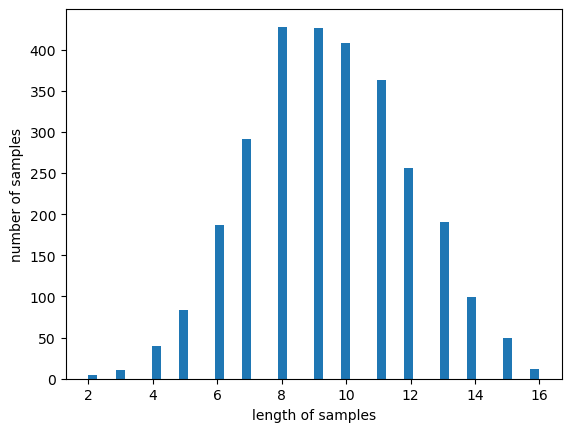

In [44]:
print('기사의 최대 길이 :',max(len(article) for article in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(article) for article in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### Word2Vec 모델링

In [47]:
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [48]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(1141, 100)

In [49]:
print(model.wv.most_similar("반려동물"))

[('펫', 0.9998042583465576), ('동물', 0.9997915625572205), ('위', 0.9997674226760864), ('사료', 0.99974524974823), ('반려견', 0.9997415542602539), ('되다', 0.999729335308075), ('반려', 0.9997292160987854), ('까지', 0.9997276067733765), ('관리', 0.9997050762176514), ('대', 0.9997009634971619)]


In [51]:
print(model.wv.most_similar("펫"))

[('반려동물', 0.9998043179512024), ('동물', 0.9997334480285645), ('반려', 0.9997275471687317), ('위', 0.999717116355896), ('개', 0.9996923804283142), ('함께', 0.9996877908706665), ('출시', 0.9996835589408875), ('사료', 0.9996762871742249), ('산업', 0.9996757507324219), ('서비스', 0.9996722936630249)]
